In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("/Users/dhrumilpatel/Documents/mind-speech-interface-ssvep")

In [2]:
from eeg_ai_layer.models.FBCCA import FBCCA
from eeg_ai_layer.models.KNN import KNN
from eeg_ai_layer.models.train import segment_data_from_trials
from eeg_ai_layer.models.utils import split_trials
from eeg_ai_layer.models.ssvep_utils import butter_bandpass_filter
from types import SimpleNamespace
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import trange
sns.set()

In [3]:
args = SimpleNamespace(
    components=1,
    window_length=4,
    sample_rate=250,
    shift_length=1,
    no_zero=True,
    model_type='fbcca_knn',
    model_path='eeg_ai_layer/models/savedmodels/leon.model'
)

knn = KNN(args)

In [49]:
import pandas as pd

offline_path = "eeg_ai_layer/data/leon/296_2022_899506.csv"
online_path = "eeg_ai_layer/data/leon_online/eeg_36.csv"

data = pd.read_csv(offline_path)
if "8" in data:
    data.drop(columns=["8"], inplace=True)

In [51]:
# import some data to play with
if 'time' in data and 'Color Code' in data:
    data.drop(columns=['time', 'Color Code'], inplace=True)

# offset 1 for Timestep
if all(data.iloc[0, 1:].values == 0):
    data.at[1, 'Frequency'] = data.loc[0, 'Frequency']
    data = data[1:]
    data.index = np.arange(data.shape[0])

trials = split_trials(data)
segments, segment_labels = segment_data_from_trials(trials=trials, window_length=args.window_length,
                                                    shift_length=args.shift_length,
                                                    sample_rate=args.sample_rate, no_zero=args.no_zero)

In [42]:
trial_freq = [(trial, trial.iloc[0]['Frequency']) for trial in trials]
non_zero_trials = [trial for trial, t in trial_freq if t != 0]
# non_zero_trials = [data[i - 1250:i] for i in range(1250, data.shape[0])]
print(len(non_zero_trials))

40


In [53]:
frequencies = [8.25, 8.75, 9.75, 10.75, 11.75, 12.75, 13.75, 14.25]
colours = ["red", "cyan", "yellow", "green", "blue", "magenta", "black", "white"]
freq2label = {freq: colour for freq, colour in zip(frequencies, colours)}
freq2ax = {freq: idx for idx, freq in enumerate(frequencies)}
freq2label, freq2ax

({8.25: 'red',
  8.75: 'cyan',
  9.75: 'yellow',
  10.75: 'green',
  11.75: 'blue',
  12.75: 'magenta',
  13.75: 'black',
  14.25: 'white'},
 {8.25: 0, 8.75: 1, 9.75: 2, 10.75: 3, 11.75: 4, 12.75: 5, 13.75: 6, 14.25: 7})

1       14.25
1252     0.00
2507    10.75
Name: Frequency, dtype: float64


100%|████████████████████| 2751/2751 [08:15<00:00,  5.55it/s]


2751
0 1000 143540.046875 143670.140625 7 14.25 white 7
1 1001 143540.046875 143670.140625 7 14.25 white 7
2 1002 143540.046875 143670.140625 7 14.25 white 7
3 1003 143540.046875 143670.140625 7 14.25 white 7
4 1004 143540.046875 143670.140625 7 14.25 white 7
5 1005 143540.046875 143670.140625 7 14.25 white 7
6 1006 143540.046875 143670.140625 7 14.25 white 7
7 1007 143540.046875 143670.140625 7 14.25 white 7
8 1008 143540.046875 143670.140625 7 14.25 white 7
9 1009 143540.046875 143670.140625 7 14.25 white 7
10 1010 143540.046875 143670.140625 7 14.25 white 7
11 1011 143540.046875 143670.140625 7 14.25 white 7
12 1012 143540.046875 143670.140625 7 14.25 white 7
13 1013 143540.046875 143670.140625 7 14.25 white 7
14 1014 143540.046875 143670.140625 7 14.25 white 7
15 1015 143540.046875 143670.140625 7 14.25 white 7
16 1016 143540.046875 143670.140625 7 14.25 white 7
17 1017 143540.046875 143670.140625 7 14.25 white 7
18 1018 143540.046875 143670.140625 7 14.25 white 7
19 1019 143540.04

191 1191 143540.046875 143670.140625 7 14.25 white 7
192 1192 143540.046875 143670.140625 7 14.25 white 7
193 1193 143540.046875 143670.140625 7 14.25 white 7
194 1194 143540.046875 143670.140625 7 14.25 white 7
195 1195 143540.046875 143670.140625 7 14.25 white 7
196 1196 143540.046875 143670.140625 7 14.25 white 7
197 1197 143540.046875 143670.140625 7 14.25 white 7
198 1198 143540.046875 143670.140625 7 14.25 white 7
199 1199 143540.046875 143670.140625 7 14.25 white 7
200 1200 143540.046875 143670.140625 7 14.25 white 7
201 1201 143540.046875 143670.140625 7 14.25 white 7
202 1202 143540.046875 143670.140625 7 14.25 white 7
203 1203 143540.046875 143670.140625 7 14.25 white 7
204 1204 143540.046875 143670.140625 7 14.25 white 7
205 1205 143540.046875 143670.140625 7 14.25 white 7
206 1206 143540.046875 143670.140625 7 14.25 white 7
207 1207 143540.046875 143670.140625 7 14.25 white 7
208 1208 143540.046875 143670.140625 7 14.25 white 7
209 1209 143540.046875 143670.140625 7 14.25 w

405 1405 138768.9375 138890.53125 6 13.75 black 6
406 1406 138768.9375 138890.53125 6 13.75 black 6
407 1407 138768.9375 138890.53125 6 13.75 black 6
408 1408 138768.9375 138890.53125 6 13.75 black 6
409 1409 138768.9375 138890.53125 6 13.75 black 6
410 1410 138768.9375 138890.53125 6 13.75 black 6
411 1411 138768.9375 138890.53125 6 13.75 black 6
412 1412 138768.9375 138890.53125 6 13.75 black 6
413 1413 138768.9375 138890.53125 6 13.75 black 6
414 1414 138768.9375 138890.53125 6 13.75 black 6
415 1415 138768.9375 138890.53125 6 13.75 black 6
416 1416 138768.9375 138890.53125 6 13.75 black 6
417 1417 138768.9375 138890.53125 6 13.75 black 6
418 1418 138768.9375 138890.53125 6 13.75 black 6
419 1419 138768.9375 138890.53125 6 13.75 black 6
420 1420 138768.9375 138890.53125 6 13.75 black 6
421 1421 138768.9375 138890.53125 6 13.75 black 6
422 1422 138768.9375 138890.53125 6 13.75 black 6
423 1423 138768.9375 138890.53125 6 13.75 black 6
424 1424 138768.9375 138890.53125 6 13.75 black 6


585 1585 138768.9375 138890.53125 6 13.75 black 6
586 1586 138768.9375 138890.53125 6 13.75 black 6
587 1587 138768.9375 138890.53125 6 13.75 black 6
588 1588 138768.9375 138890.53125 6 13.75 black 6
589 1589 138768.9375 138890.53125 6 13.75 black 6
590 1590 138768.9375 138890.53125 6 13.75 black 6
591 1591 138768.9375 138890.53125 6 13.75 black 6
592 1592 138768.9375 138890.53125 6 13.75 black 6
593 1593 138768.9375 138890.53125 6 13.75 black 6
594 1594 138768.9375 138890.53125 6 13.75 black 6
595 1595 138768.9375 138890.53125 6 13.75 black 6
596 1596 138768.9375 138890.53125 6 13.75 black 6
597 1597 138768.9375 138890.53125 6 13.75 black 6
598 1598 138768.9375 138890.53125 6 13.75 black 6
599 1599 105529.3828125 105651.9609375 4 11.75 blue 4
600 1600 105529.3828125 105651.9609375 4 11.75 blue 4
601 1601 138768.9375 138890.53125 6 13.75 black 6
602 1602 138768.9375 138890.53125 6 13.75 black 6
603 1603 138768.9375 138890.53125 6 13.75 black 6
604 1604 138768.9375 138890.53125 6 13.75 

799 1799 105529.3828125 105651.9609375 4 11.75 blue 4
800 1800 112479.8828125 112992.3671875 2 9.75 yellow 2
801 1801 105529.3828125 105651.9609375 4 11.75 blue 4
802 1802 105529.3828125 105651.9609375 4 11.75 blue 4
803 1803 105529.3828125 105651.9609375 4 11.75 blue 4
804 1804 105529.3828125 105651.9609375 4 11.75 blue 4
805 1805 105529.3828125 105651.9609375 4 11.75 blue 4
806 1806 105529.3828125 105651.9609375 4 11.75 blue 4
807 1807 105529.3828125 105651.9609375 4 11.75 blue 4
808 1808 105529.3828125 105651.9609375 4 11.75 blue 4
809 1809 105529.3828125 105651.9609375 4 11.75 blue 4
810 1810 105529.3828125 105651.9609375 4 11.75 blue 4
811 1811 105529.3828125 105651.9609375 4 11.75 blue 4
812 1812 105529.3828125 105651.9609375 4 11.75 blue 4
813 1813 105529.3828125 105651.9609375 4 11.75 blue 4
814 1814 105529.3828125 105651.9609375 4 11.75 blue 4
815 1815 105529.3828125 105651.9609375 4 11.75 blue 4
816 1816 105529.3828125 105651.9609375 4 11.75 blue 4
817 1817 105529.3828125 105

975 1975 128936.7578125 129610.796875 3 10.75 green 3
976 1976 138768.9375 138890.53125 6 13.75 black 6
977 1977 138768.9375 138890.53125 6 13.75 black 6
978 1978 138768.9375 138890.53125 6 13.75 black 6
979 1979 138768.9375 138890.53125 6 13.75 black 6
980 1980 138768.9375 138890.53125 6 13.75 black 6
981 1981 138768.9375 138890.53125 6 13.75 black 6
982 1982 138768.9375 138890.53125 6 13.75 black 6
983 1983 138768.9375 138890.53125 6 13.75 black 6
984 1984 138768.9375 138890.53125 6 13.75 black 6
985 1985 138768.9375 138890.53125 6 13.75 black 6
986 1986 138768.9375 138890.53125 6 13.75 black 6
987 1987 138768.9375 138890.53125 6 13.75 black 6
988 1988 138768.9375 138890.53125 6 13.75 black 6
989 1989 138768.9375 138890.53125 6 13.75 black 6
990 1990 138768.9375 138890.53125 6 13.75 black 6
991 1991 138768.9375 138890.53125 6 13.75 black 6
992 1992 138768.9375 138890.53125 6 13.75 black 6
993 1993 138768.9375 138890.53125 6 13.75 black 6
994 1994 138768.9375 138890.53125 6 13.75 blac

1169 2169 128936.7578125 129610.796875 3 10.75 green 3
1170 2170 138768.9375 138890.53125 6 13.75 black 6
1171 2171 138768.9375 138890.53125 6 13.75 black 6
1172 2172 128936.7578125 129610.796875 3 10.75 green 3
1173 2173 128936.7578125 129610.796875 3 10.75 green 3
1174 2174 128936.7578125 129610.796875 3 10.75 green 3
1175 2175 128936.7578125 129610.796875 3 10.75 green 3
1176 2176 128936.7578125 129610.796875 3 10.75 green 3
1177 2177 128936.7578125 129610.796875 3 10.75 green 3
1178 2178 128936.7578125 129610.796875 3 10.75 green 3
1179 2179 128936.7578125 129610.796875 3 10.75 green 3
1180 2180 128936.7578125 129610.796875 3 10.75 green 3
1181 2181 128936.7578125 129610.796875 3 10.75 green 3
1182 2182 128936.7578125 129610.796875 3 10.75 green 3
1183 2183 128936.7578125 129610.796875 3 10.75 green 3
1184 2184 128936.7578125 129610.796875 3 10.75 green 3
1185 2185 128936.7578125 129610.796875 3 10.75 green 3
1186 2186 128936.7578125 129610.796875 3 10.75 green 3
1187 2187 128936.7

1346 2346 138768.9375 138890.53125 6 13.75 black 6
1347 2347 128936.7578125 129610.796875 3 10.75 green 3
1348 2348 128936.7578125 129610.796875 3 10.75 green 3
1349 2349 138768.9375 138890.53125 6 13.75 black 6
1350 2350 138768.9375 138890.53125 6 13.75 black 6
1351 2351 138768.9375 138890.53125 6 13.75 black 6
1352 2352 138768.9375 138890.53125 6 13.75 black 6
1353 2353 138768.9375 138890.53125 6 13.75 black 6
1354 2354 138768.9375 138890.53125 6 13.75 black 6
1355 2355 138768.9375 138890.53125 6 13.75 black 6
1356 2356 138768.9375 138890.53125 6 13.75 black 6
1357 2357 138768.9375 138890.53125 6 13.75 black 6
1358 2358 138768.9375 138890.53125 6 13.75 black 6
1359 2359 138768.9375 138890.53125 6 13.75 black 6
1360 2360 138768.9375 138890.53125 6 13.75 black 6
1361 2361 138768.9375 138890.53125 6 13.75 black 6
1362 2362 138768.9375 138890.53125 6 13.75 black 6
1363 2363 138768.9375 138890.53125 6 13.75 black 6
1364 2364 138768.9375 138890.53125 6 13.75 black 6
1365 2365 138768.9375 1

1523 2523 128936.7578125 129610.796875 3 10.75 green 3
1524 2524 128936.7578125 129610.796875 3 10.75 green 3
1525 2525 128936.7578125 129610.796875 3 10.75 green 3
1526 2526 128936.7578125 129610.796875 3 10.75 green 3
1527 2527 128936.7578125 129610.796875 3 10.75 green 3
1528 2528 128936.7578125 129610.796875 3 10.75 green 3
1529 2529 128936.7578125 129610.796875 3 10.75 green 3
1530 2530 138768.9375 138890.53125 6 13.75 black 6
1531 2531 128936.7578125 129610.796875 3 10.75 green 3
1532 2532 128936.7578125 129610.796875 3 10.75 green 3
1533 2533 128936.7578125 129610.796875 3 10.75 green 3
1534 2534 128936.7578125 129610.796875 3 10.75 green 3
1535 2535 128936.7578125 129610.796875 3 10.75 green 3
1536 2536 128936.7578125 129610.796875 3 10.75 green 3
1537 2537 128936.7578125 129610.796875 3 10.75 green 3
1538 2538 128936.7578125 129610.796875 3 10.75 green 3
1539 2539 128936.7578125 129610.796875 3 10.75 green 3
1540 2540 128936.7578125 129610.796875 3 10.75 green 3
1541 2541 1289

1710 2710 138768.9375 138890.53125 6 13.75 black 6
1711 2711 115290.390625 115534.4765625 0 8.25 red 0
1712 2712 138768.9375 138890.53125 6 13.75 black 6
1713 2713 138768.9375 138890.53125 6 13.75 black 6
1714 2714 138768.9375 138890.53125 6 13.75 black 6
1715 2715 138768.9375 138890.53125 6 13.75 black 6
1716 2716 112479.8828125 112992.3671875 2 9.75 yellow 2
1717 2717 138768.9375 138890.53125 6 13.75 black 6
1718 2718 138768.9375 138890.53125 6 13.75 black 6
1719 2719 128936.7578125 129610.796875 3 10.75 green 3
1720 2720 112479.8828125 112992.3671875 2 9.75 yellow 2
1721 2721 112479.8828125 112992.3671875 2 9.75 yellow 2
1722 2722 138768.9375 138890.53125 6 13.75 black 6
1723 2723 112479.8828125 112992.3671875 2 9.75 yellow 2
1724 2724 112479.8828125 112992.3671875 2 9.75 yellow 2
1725 2725 138768.9375 138890.53125 6 13.75 black 6
1726 2726 138768.9375 138890.53125 6 13.75 black 6
1727 2727 138768.9375 138890.53125 6 13.75 black 6
1728 2728 138768.9375 138890.53125 6 13.75 black 6
1

1873 2873 112479.8828125 112992.3671875 2 9.75 yellow 2
1874 2874 112479.8828125 112992.3671875 2 9.75 yellow 2
1875 2875 112479.8828125 112992.3671875 2 9.75 yellow 2
1876 2876 112479.8828125 112992.3671875 2 9.75 yellow 2
1877 2877 112479.8828125 112992.3671875 2 9.75 yellow 2
1878 2878 138768.9375 138890.53125 6 13.75 black 6
1879 2879 138768.9375 138890.53125 6 13.75 black 6
1880 2880 138768.9375 138890.53125 6 13.75 black 6
1881 2881 138768.9375 138890.53125 6 13.75 black 6
1882 2882 112479.8828125 112992.3671875 2 9.75 yellow 2
1883 2883 112479.8828125 112992.3671875 2 9.75 yellow 2
1884 2884 112479.8828125 112992.3671875 2 9.75 yellow 2
1885 2885 112479.8828125 112992.3671875 2 9.75 yellow 2
1886 2886 138768.9375 138890.53125 6 13.75 black 6
1887 2887 138768.9375 138890.53125 6 13.75 black 6
1888 2888 112479.8828125 112992.3671875 2 9.75 yellow 2
1889 2889 138768.9375 138890.53125 6 13.75 black 6
1890 2890 138768.9375 138890.53125 6 13.75 black 6
1891 2891 138768.9375 138890.531

2054 3054 91996.296875 92169.75 5 12.75 magenta 5
2055 3055 143540.046875 143670.140625 7 14.25 white 7
2056 3056 143540.046875 143670.140625 7 14.25 white 7
2057 3057 91996.296875 92169.75 5 12.75 magenta 5
2058 3058 91996.296875 92169.75 5 12.75 magenta 5
2059 3059 91996.296875 92169.75 5 12.75 magenta 5
2060 3060 91996.296875 92169.75 5 12.75 magenta 5
2061 3061 91996.296875 92169.75 5 12.75 magenta 5
2062 3062 91996.296875 92169.75 5 12.75 magenta 5
2063 3063 91996.296875 92169.75 5 12.75 magenta 5
2064 3064 91996.296875 92169.75 5 12.75 magenta 5
2065 3065 91996.296875 92169.75 5 12.75 magenta 5
2066 3066 143540.046875 143670.140625 7 14.25 white 7
2067 3067 105529.3828125 105651.9609375 4 11.75 blue 4
2068 3068 91996.296875 92169.75 5 12.75 magenta 5
2069 3069 143540.046875 143670.140625 7 14.25 white 7
2070 3070 105529.3828125 105651.9609375 4 11.75 blue 4
2071 3071 105529.3828125 105651.9609375 4 11.75 blue 4
2072 3072 105529.3828125 105651.9609375 4 11.75 blue 4
2073 3073 1435

2208 3208 91996.296875 92169.75 5 12.75 magenta 5
2209 3209 91996.296875 92169.75 5 12.75 magenta 5
2210 3210 91996.296875 92169.75 5 12.75 magenta 5
2211 3211 91996.296875 92169.75 5 12.75 magenta 5
2212 3212 91996.296875 92169.75 5 12.75 magenta 5
2213 3213 91996.296875 92169.75 5 12.75 magenta 5
2214 3214 91996.296875 92169.75 5 12.75 magenta 5
2215 3215 91996.296875 92169.75 5 12.75 magenta 5
2216 3216 91996.296875 92169.75 5 12.75 magenta 5
2217 3217 91996.296875 92169.75 5 12.75 magenta 5
2218 3218 91996.296875 92169.75 5 12.75 magenta 5
2219 3219 91996.296875 92169.75 5 12.75 magenta 5
2220 3220 91996.296875 92169.75 5 12.75 magenta 5
2221 3221 91996.296875 92169.75 5 12.75 magenta 5
2222 3222 91996.296875 92169.75 5 12.75 magenta 5
2223 3223 91996.296875 92169.75 5 12.75 magenta 5
2224 3224 91996.296875 92169.75 5 12.75 magenta 5
2225 3225 91996.296875 92169.75 5 12.75 magenta 5
2226 3226 91996.296875 92169.75 5 12.75 magenta 5
2227 3227 91996.296875 92169.75 5 12.75 magenta 5


2383 3383 112479.8828125 112992.3671875 2 9.75 yellow 2
2384 3384 112479.8828125 112992.3671875 2 9.75 yellow 2
2385 3385 128936.7578125 129610.796875 3 10.75 green 3
2386 3386 112479.8828125 112992.3671875 2 9.75 yellow 2
2387 3387 128936.7578125 129610.796875 3 10.75 green 3
2388 3388 128936.7578125 129610.796875 3 10.75 green 3
2389 3389 128936.7578125 129610.796875 3 10.75 green 3
2390 3390 128936.7578125 129610.796875 3 10.75 green 3
2391 3391 105343.953125 105493.3515625 1 8.75 cyan 1
2392 3392 128936.7578125 129610.796875 3 10.75 green 3
2393 3393 128936.7578125 129610.796875 3 10.75 green 3
2394 3394 128936.7578125 129610.796875 3 10.75 green 3
2395 3395 128936.7578125 129610.796875 3 10.75 green 3
2396 3396 128936.7578125 129610.796875 3 10.75 green 3
2397 3397 128936.7578125 129610.796875 3 10.75 green 3
2398 3398 128936.7578125 129610.796875 3 10.75 green 3
2399 3399 128936.7578125 129610.796875 3 10.75 green 3
2400 3400 128936.7578125 129610.796875 3 10.75 green 3
2401 3401

2538 3538 128936.7578125 129610.796875 3 10.75 green 3
2539 3539 128936.7578125 129610.796875 3 10.75 green 3
2540 3540 128936.7578125 129610.796875 3 10.75 green 3
2541 3541 128936.7578125 129610.796875 3 10.75 green 3
2542 3542 128936.7578125 129610.796875 3 10.75 green 3
2543 3543 128936.7578125 129610.796875 3 10.75 green 3
2544 3544 128936.7578125 129610.796875 3 10.75 green 3
2545 3545 128936.7578125 129610.796875 3 10.75 green 3
2546 3546 128936.7578125 129610.796875 3 10.75 green 3
2547 3547 128936.7578125 129610.796875 3 10.75 green 3
2548 3548 128936.7578125 129610.796875 3 10.75 green 3
2549 3549 128936.7578125 129610.796875 3 10.75 green 3
2550 3550 128936.7578125 129610.796875 3 10.75 green 3
2551 3551 128936.7578125 129610.796875 3 10.75 green 3
2552 3552 128936.7578125 129610.796875 3 10.75 green 3
2553 3553 128936.7578125 129610.796875 3 10.75 green 3
2554 3554 128936.7578125 129610.796875 3 10.75 green 3
2555 3555 128936.7578125 129610.796875 3 10.75 green 3
2556 3556 

2699 3699 128936.7578125 129610.796875 3 10.75 green 3
2700 3700 128936.7578125 129610.796875 3 10.75 green 3
2701 3701 128936.7578125 129610.796875 3 10.75 green 3
2702 3702 128936.7578125 129610.796875 3 10.75 green 3
2703 3703 128936.7578125 129610.796875 3 10.75 green 3
2704 3704 128936.7578125 129610.796875 3 10.75 green 3
2705 3705 128936.7578125 129610.796875 3 10.75 green 3
2706 3706 128936.7578125 129610.796875 3 10.75 green 3
2707 3707 128936.7578125 129610.796875 3 10.75 green 3
2708 3708 128936.7578125 129610.796875 3 10.75 green 3
2709 3709 128936.7578125 129610.796875 3 10.75 green 3
2710 3710 128936.7578125 129610.796875 3 10.75 green 3
2711 3711 128936.7578125 129610.796875 3 10.75 green 3
2712 3712 128936.7578125 129610.796875 3 10.75 green 3
2713 3713 128936.7578125 129610.796875 3 10.75 green 3
2714 3714 128936.7578125 129610.796875 3 10.75 green 3
2715 3715 128936.7578125 129610.796875 3 10.75 green 3
2716 3716 128936.7578125 129610.796875 3 10.75 green 3
2717 3717 

<Figure size 5000x3000 with 0 Axes>

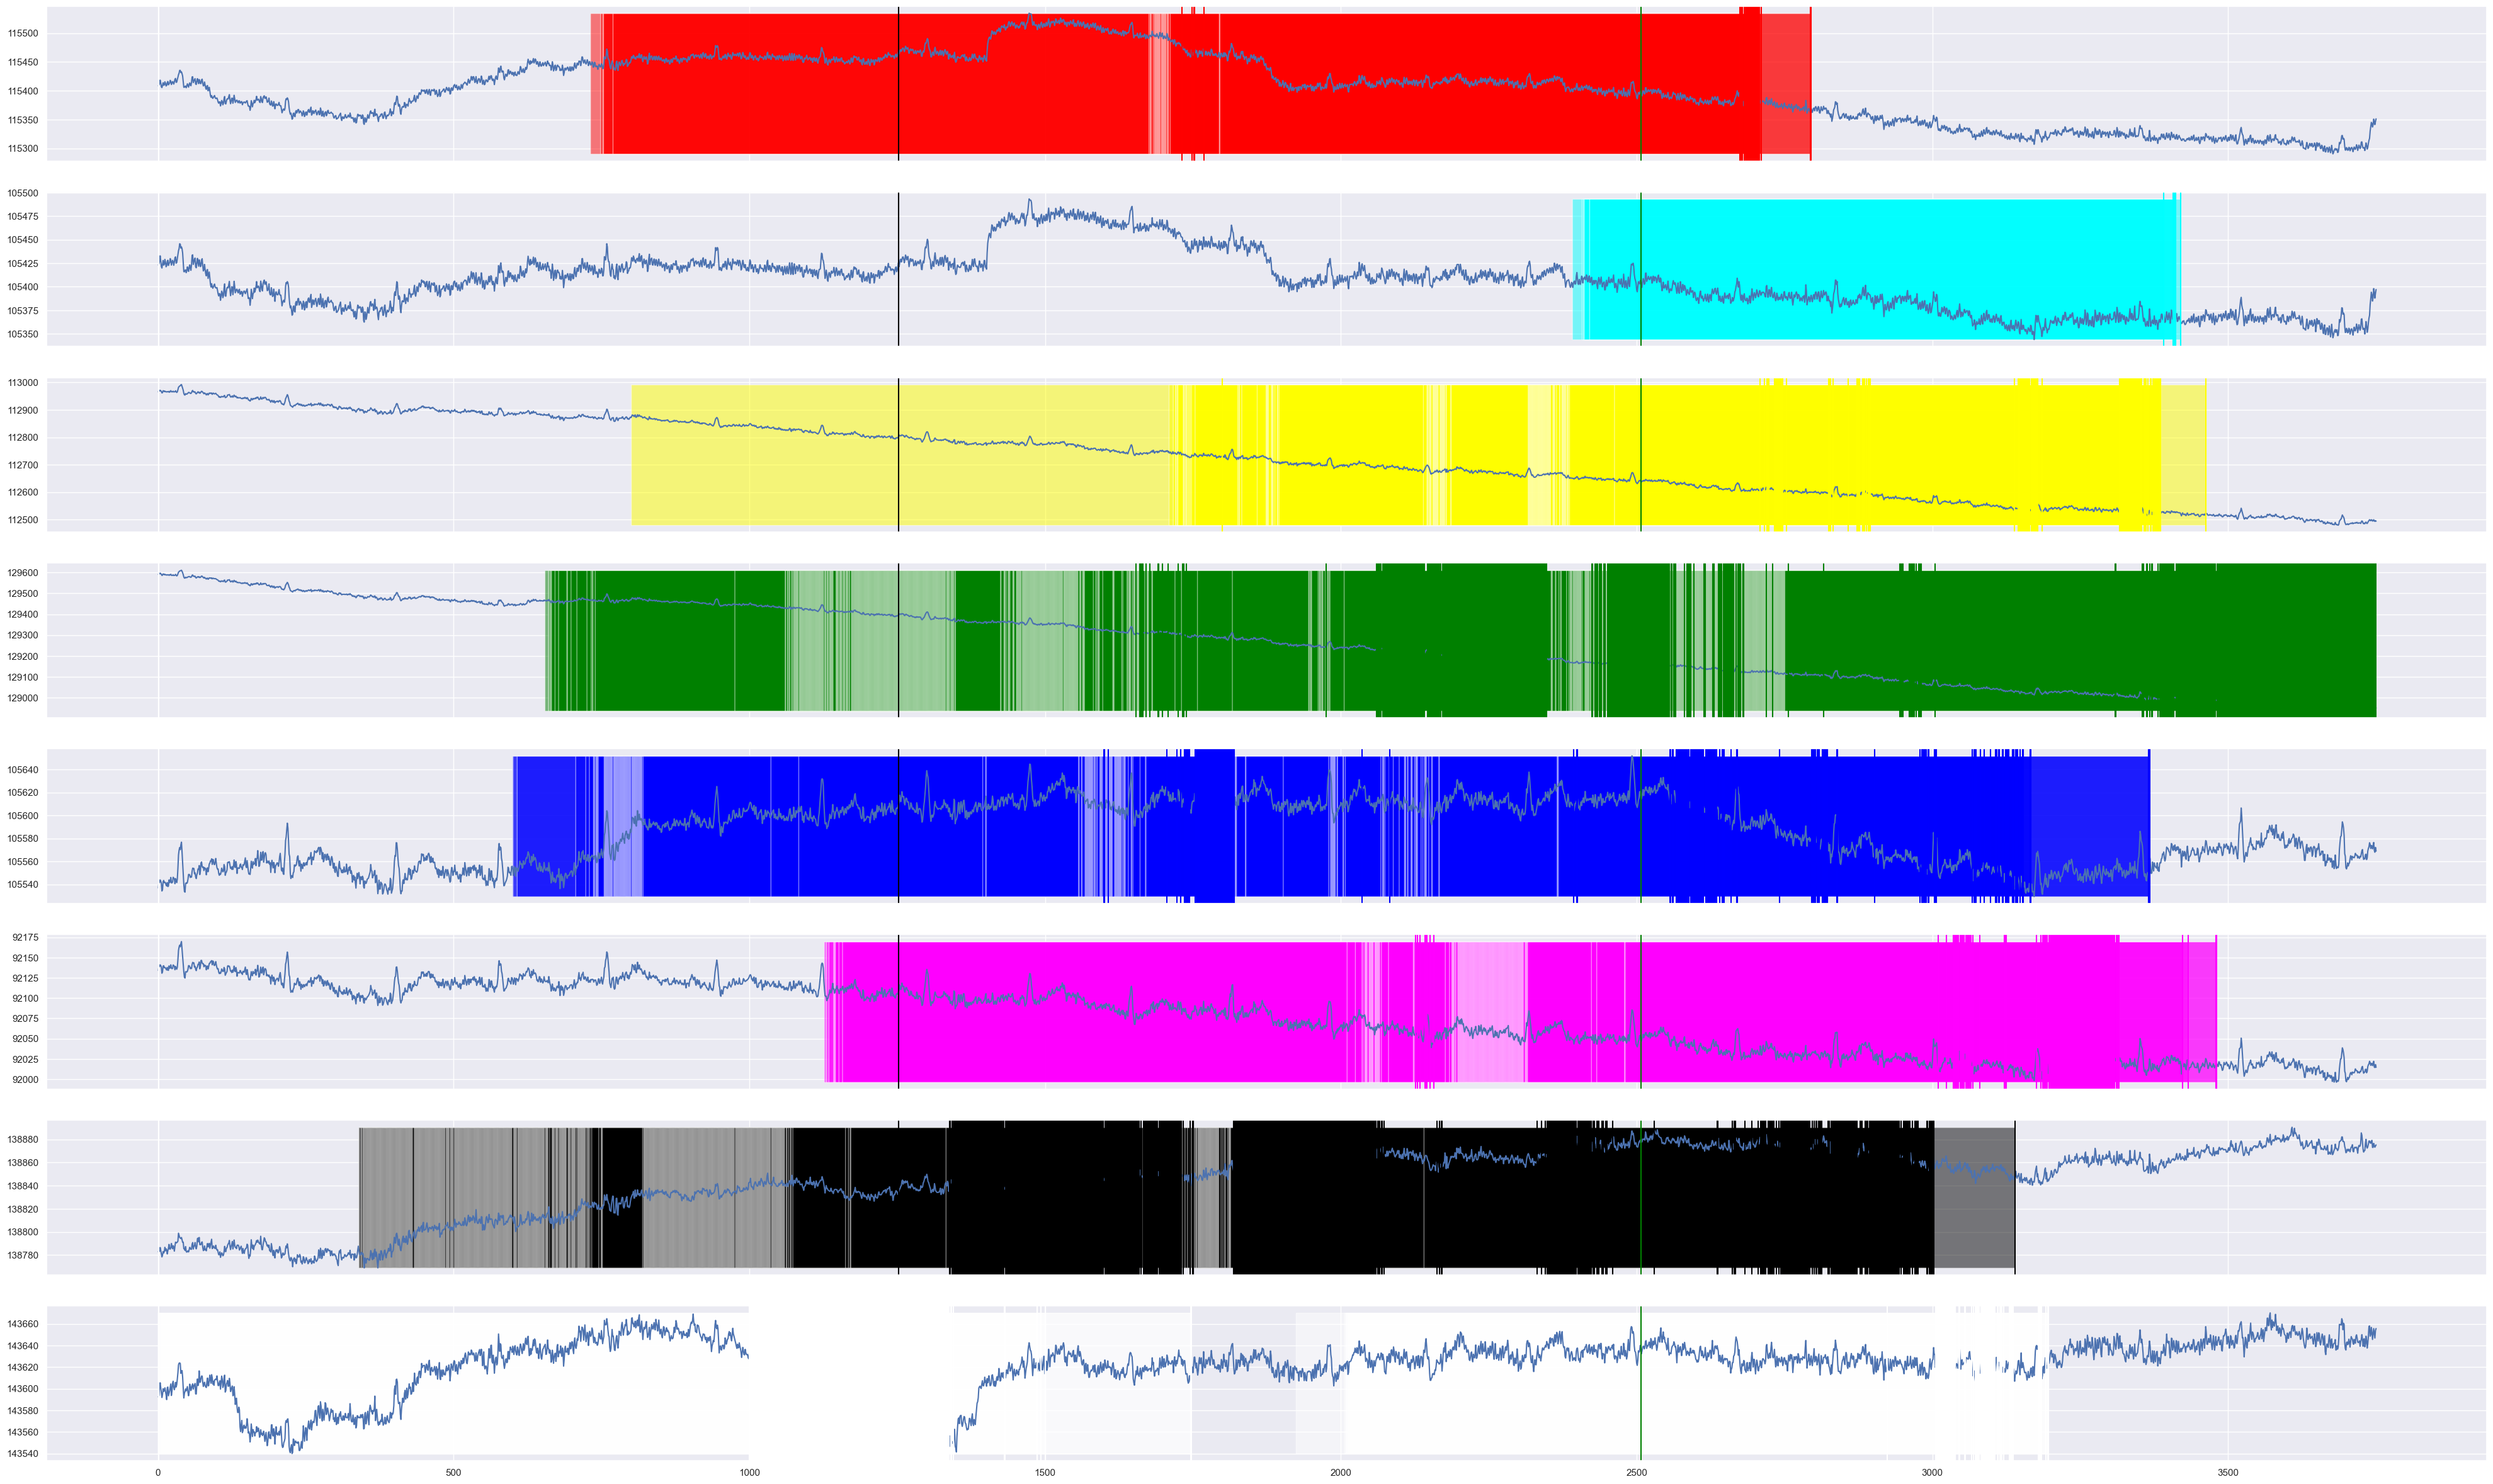

In [79]:
def colour_data(data, duration, channel_data = [str(idx) for idx in range(8)], windowed_predictions = []):
    data.index = np.arange(1, data.shape[0] + 1)
    if 'Frequency' in data:
        frequency = data['Frequency']
        data = data.drop(columns=['Frequency'])
    plt.figure(figsize=(50, 30))
    fig, axes = plt.subplots(8, 1, sharex=True, figsize=(50, 30))
    for idx, ax in enumerate(axes):
        ax.plot(data.loc[:, channel_data[idx]])

    positions = frequency.dropna()
    for pos in positions.index:
        freq = frequency[pos]
        color = 'black'
        if freq != 0:
            color = freq2label[freq]
        for ax in axes:
            ax.axvline(pos, 0, 1, color=color)
    
    if not windowed_predictions:
        windowed_predictions = []
        samp = np.array(data)
        samp = np.expand_dims(samp, axis=0)
        for end_index in trange(duration, data.shape[0] + 1):
            sample = samp[:, end_index - duration: end_index]
            prepared = knn.prepare(sample)
            prediction, correlations = knn.predict(prepared)
            frequency = knn.convert_index_to_frequency(prediction)
            windowed_predictions.append(frequency[0])
    
    for ei, wp in enumerate(windowed_predictions):
        xf = np.linspace(ei, ei + duration, duration)
        idx = freq2ax[wp]
        small = data.loc[:, channel_data[idx]].min()
        beeg = data.loc[:, channel_data[idx]].max()
        axes[idx].fill_between(xf, small, beeg, facecolor=freq2label[wp], alpha=0.5)
        axes[idx].axvline(ei + duration, 0, 1, color=freq2label[wp])
    plt.show()
    return windowed_predictions
duration = args.window_length * args.sample_rate

# channel_data = [str(idx) for idx in range(8)]
channel_data = [f"CH{idx + 1}" for idx in range(8)]
predicted = colour_data(data[6517:10267], duration, channel_data)

100%|██████████████████████| 251/251 [00:53<00:00,  4.65it/s]


<Figure size 5000x3000 with 0 Axes>

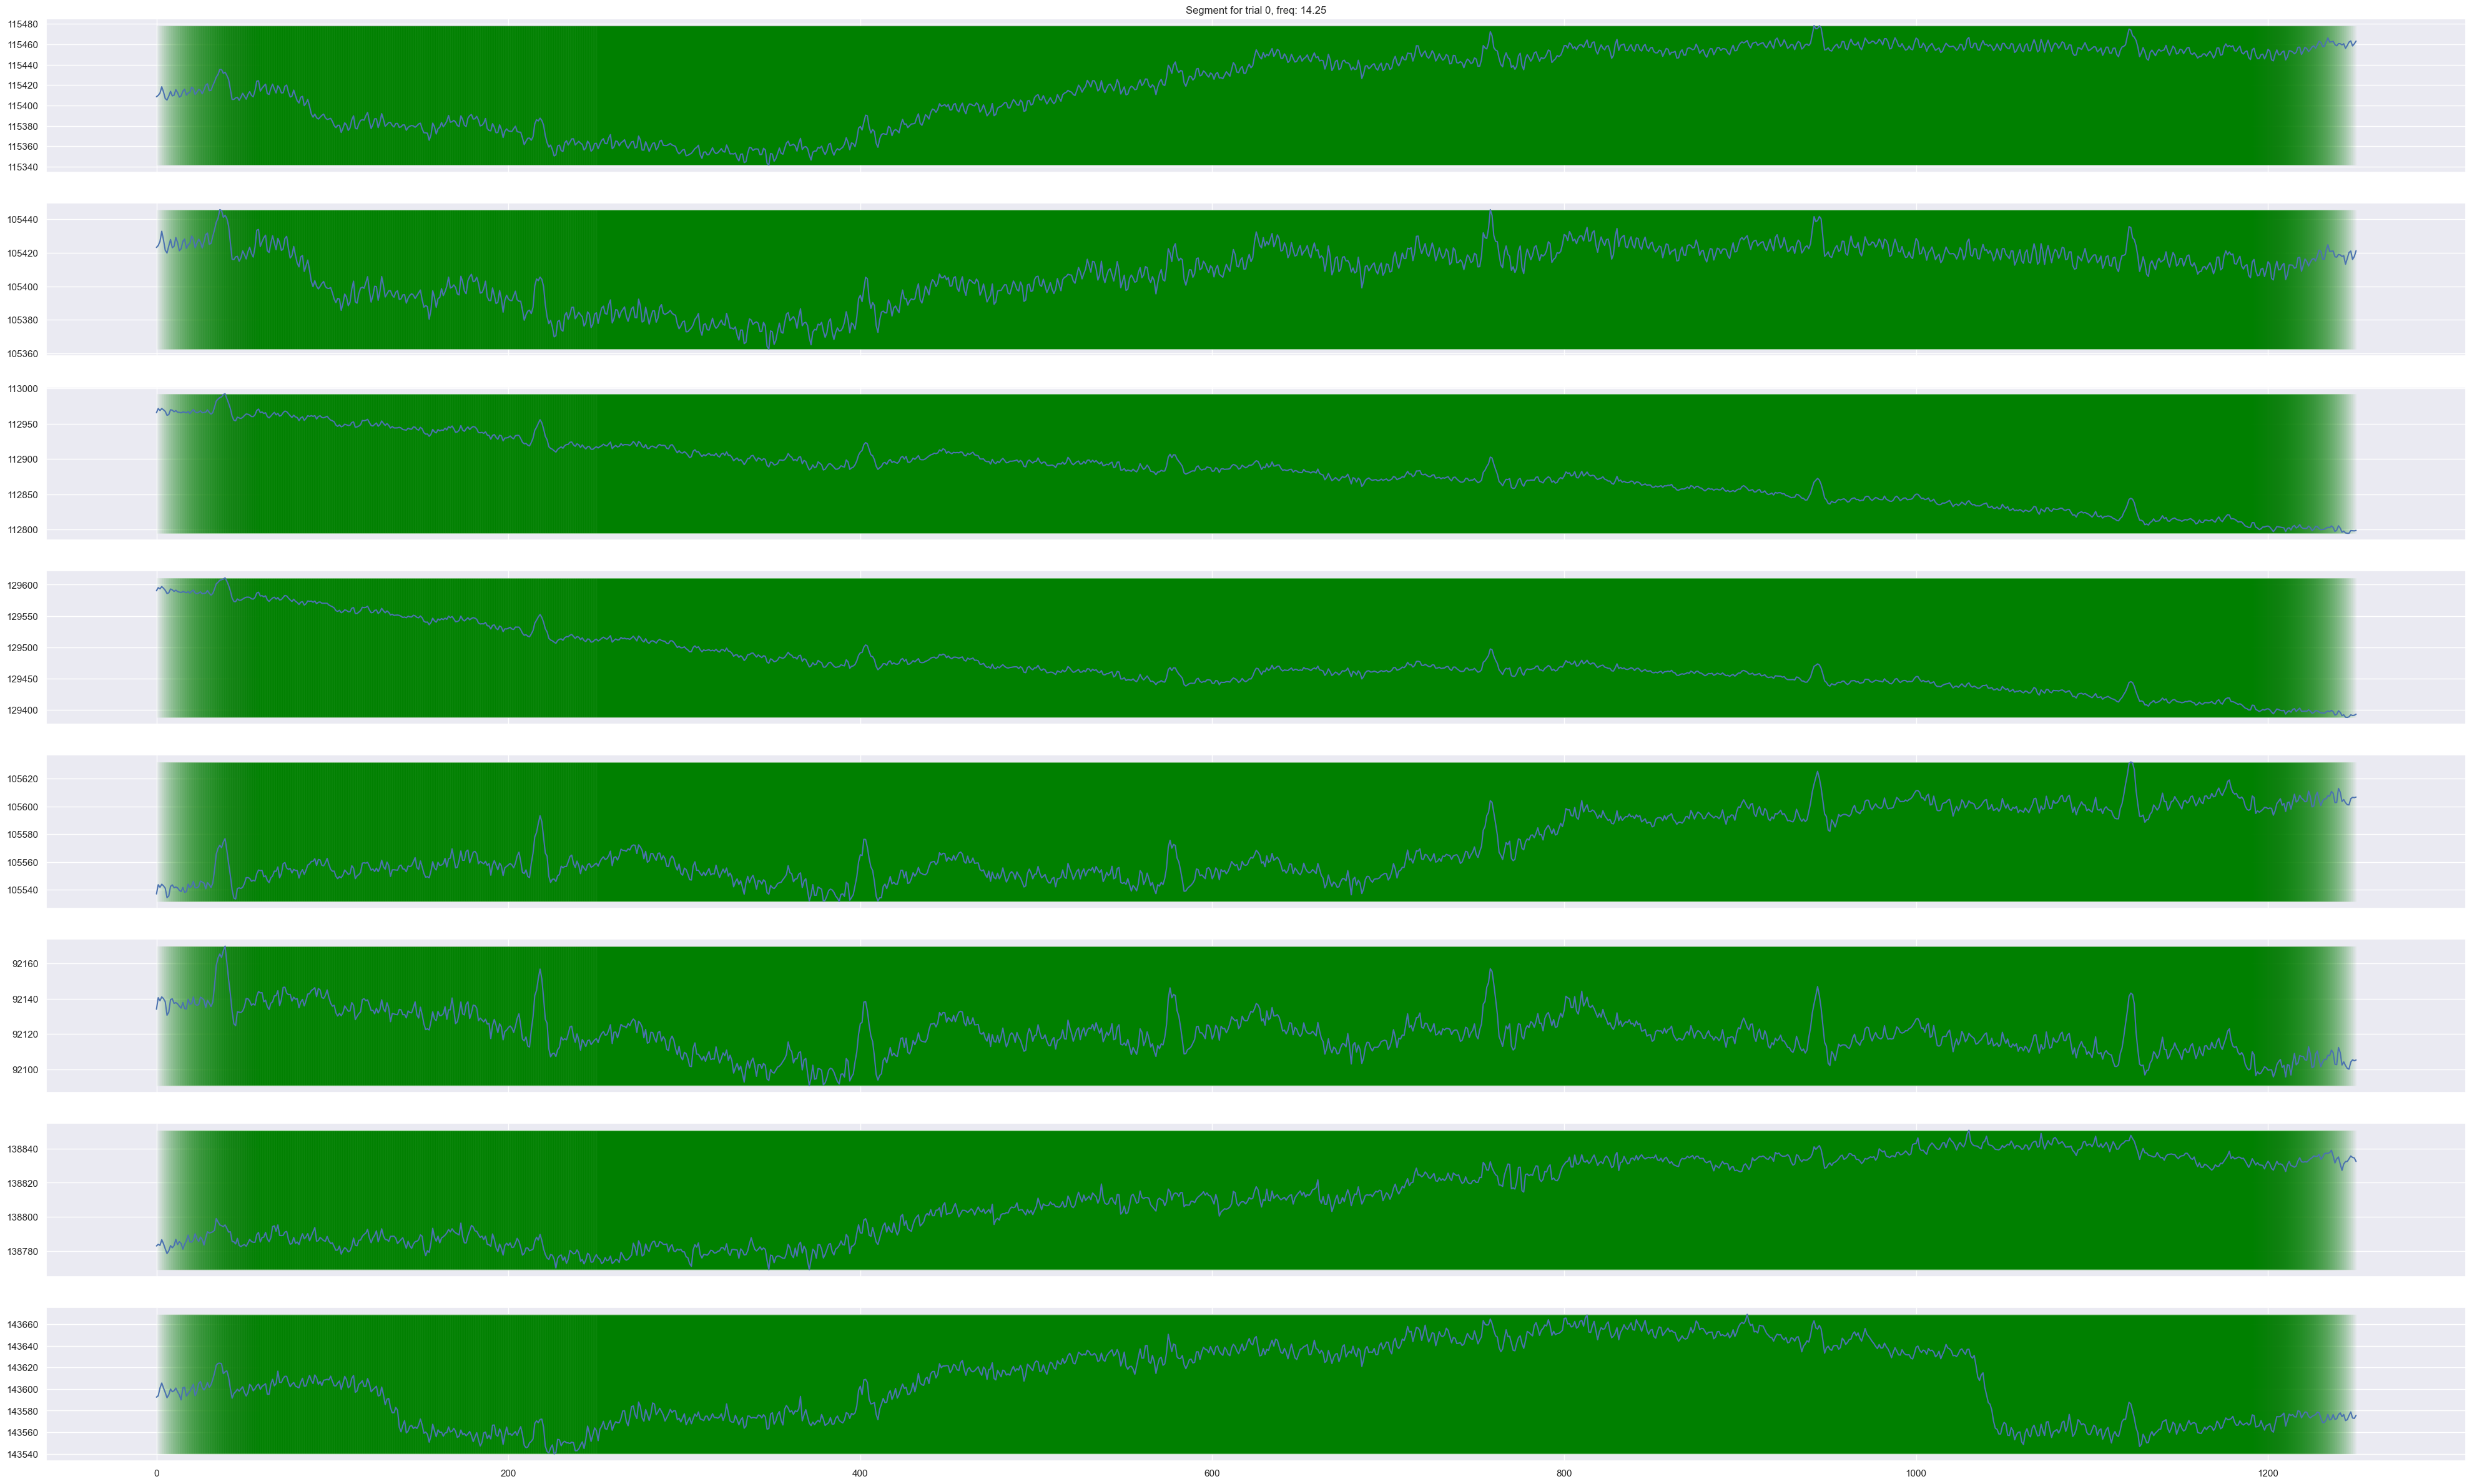

100%|██████████████████████| 252/252 [00:54<00:00,  4.61it/s]


<Figure size 5000x3000 with 0 Axes>

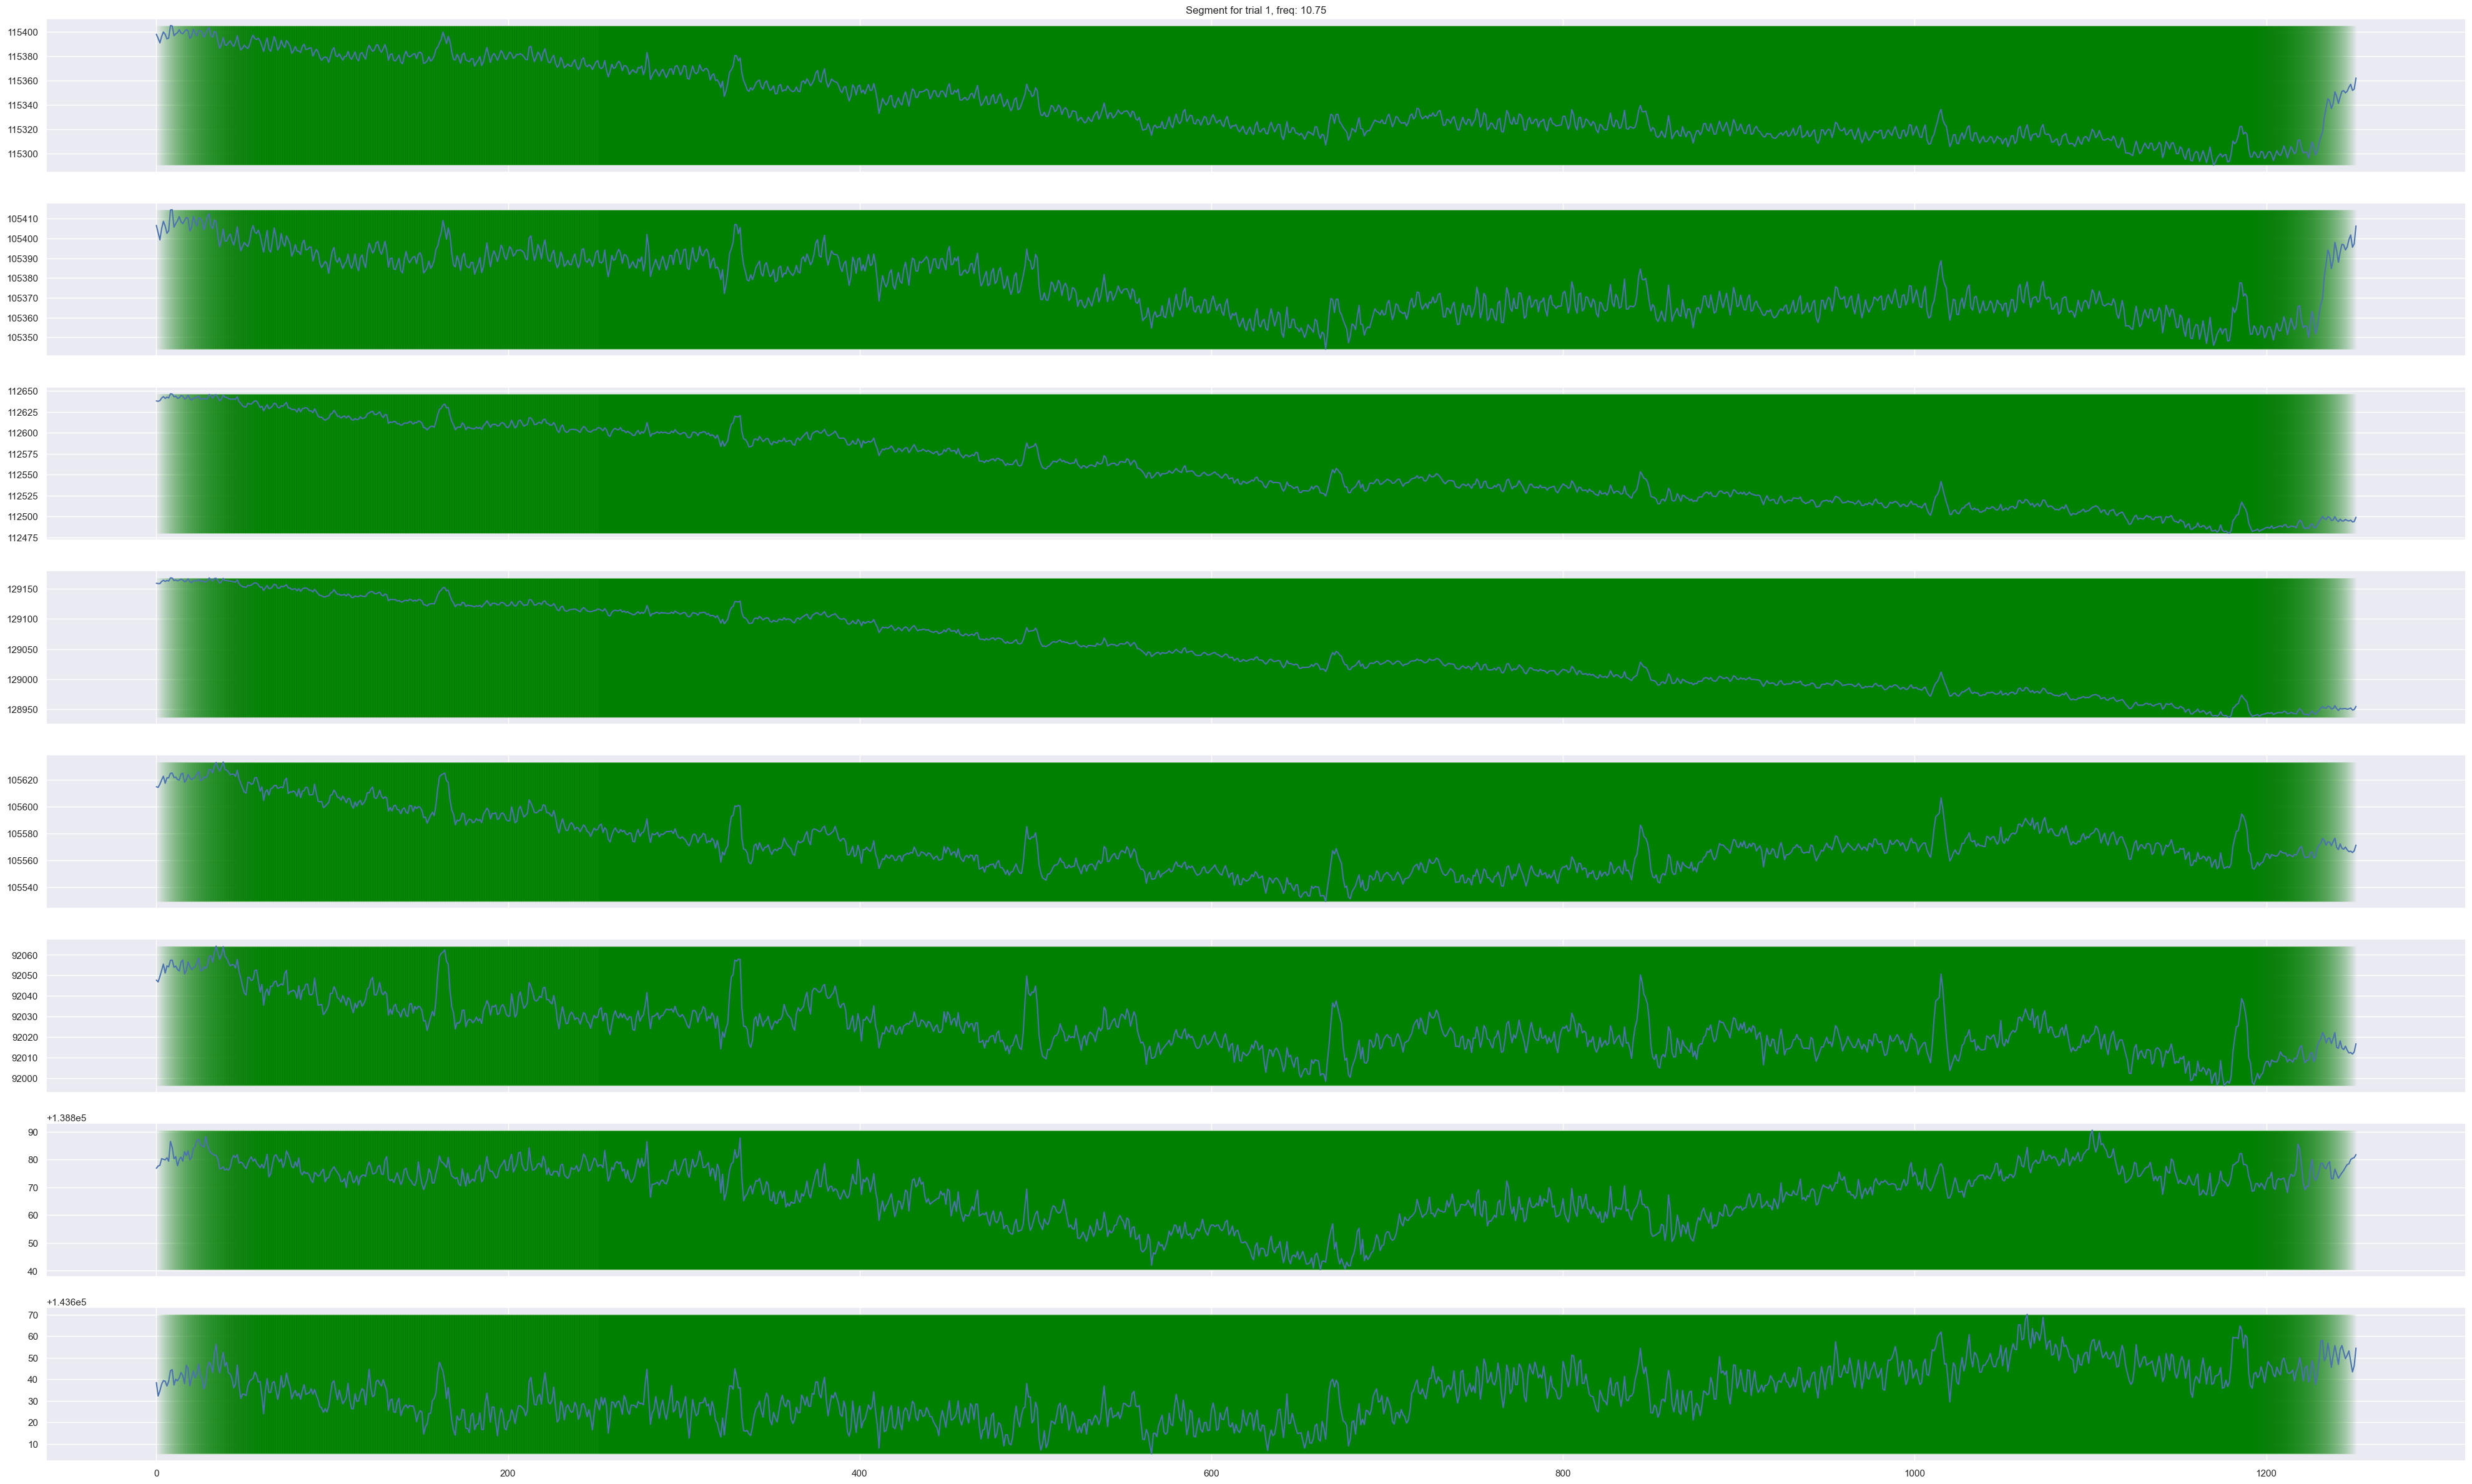

  7%|█▋                     | 19/254 [00:04<00:51,  4.57it/s]


KeyboardInterrupt: 

<Figure size 5000x3000 with 0 Axes>

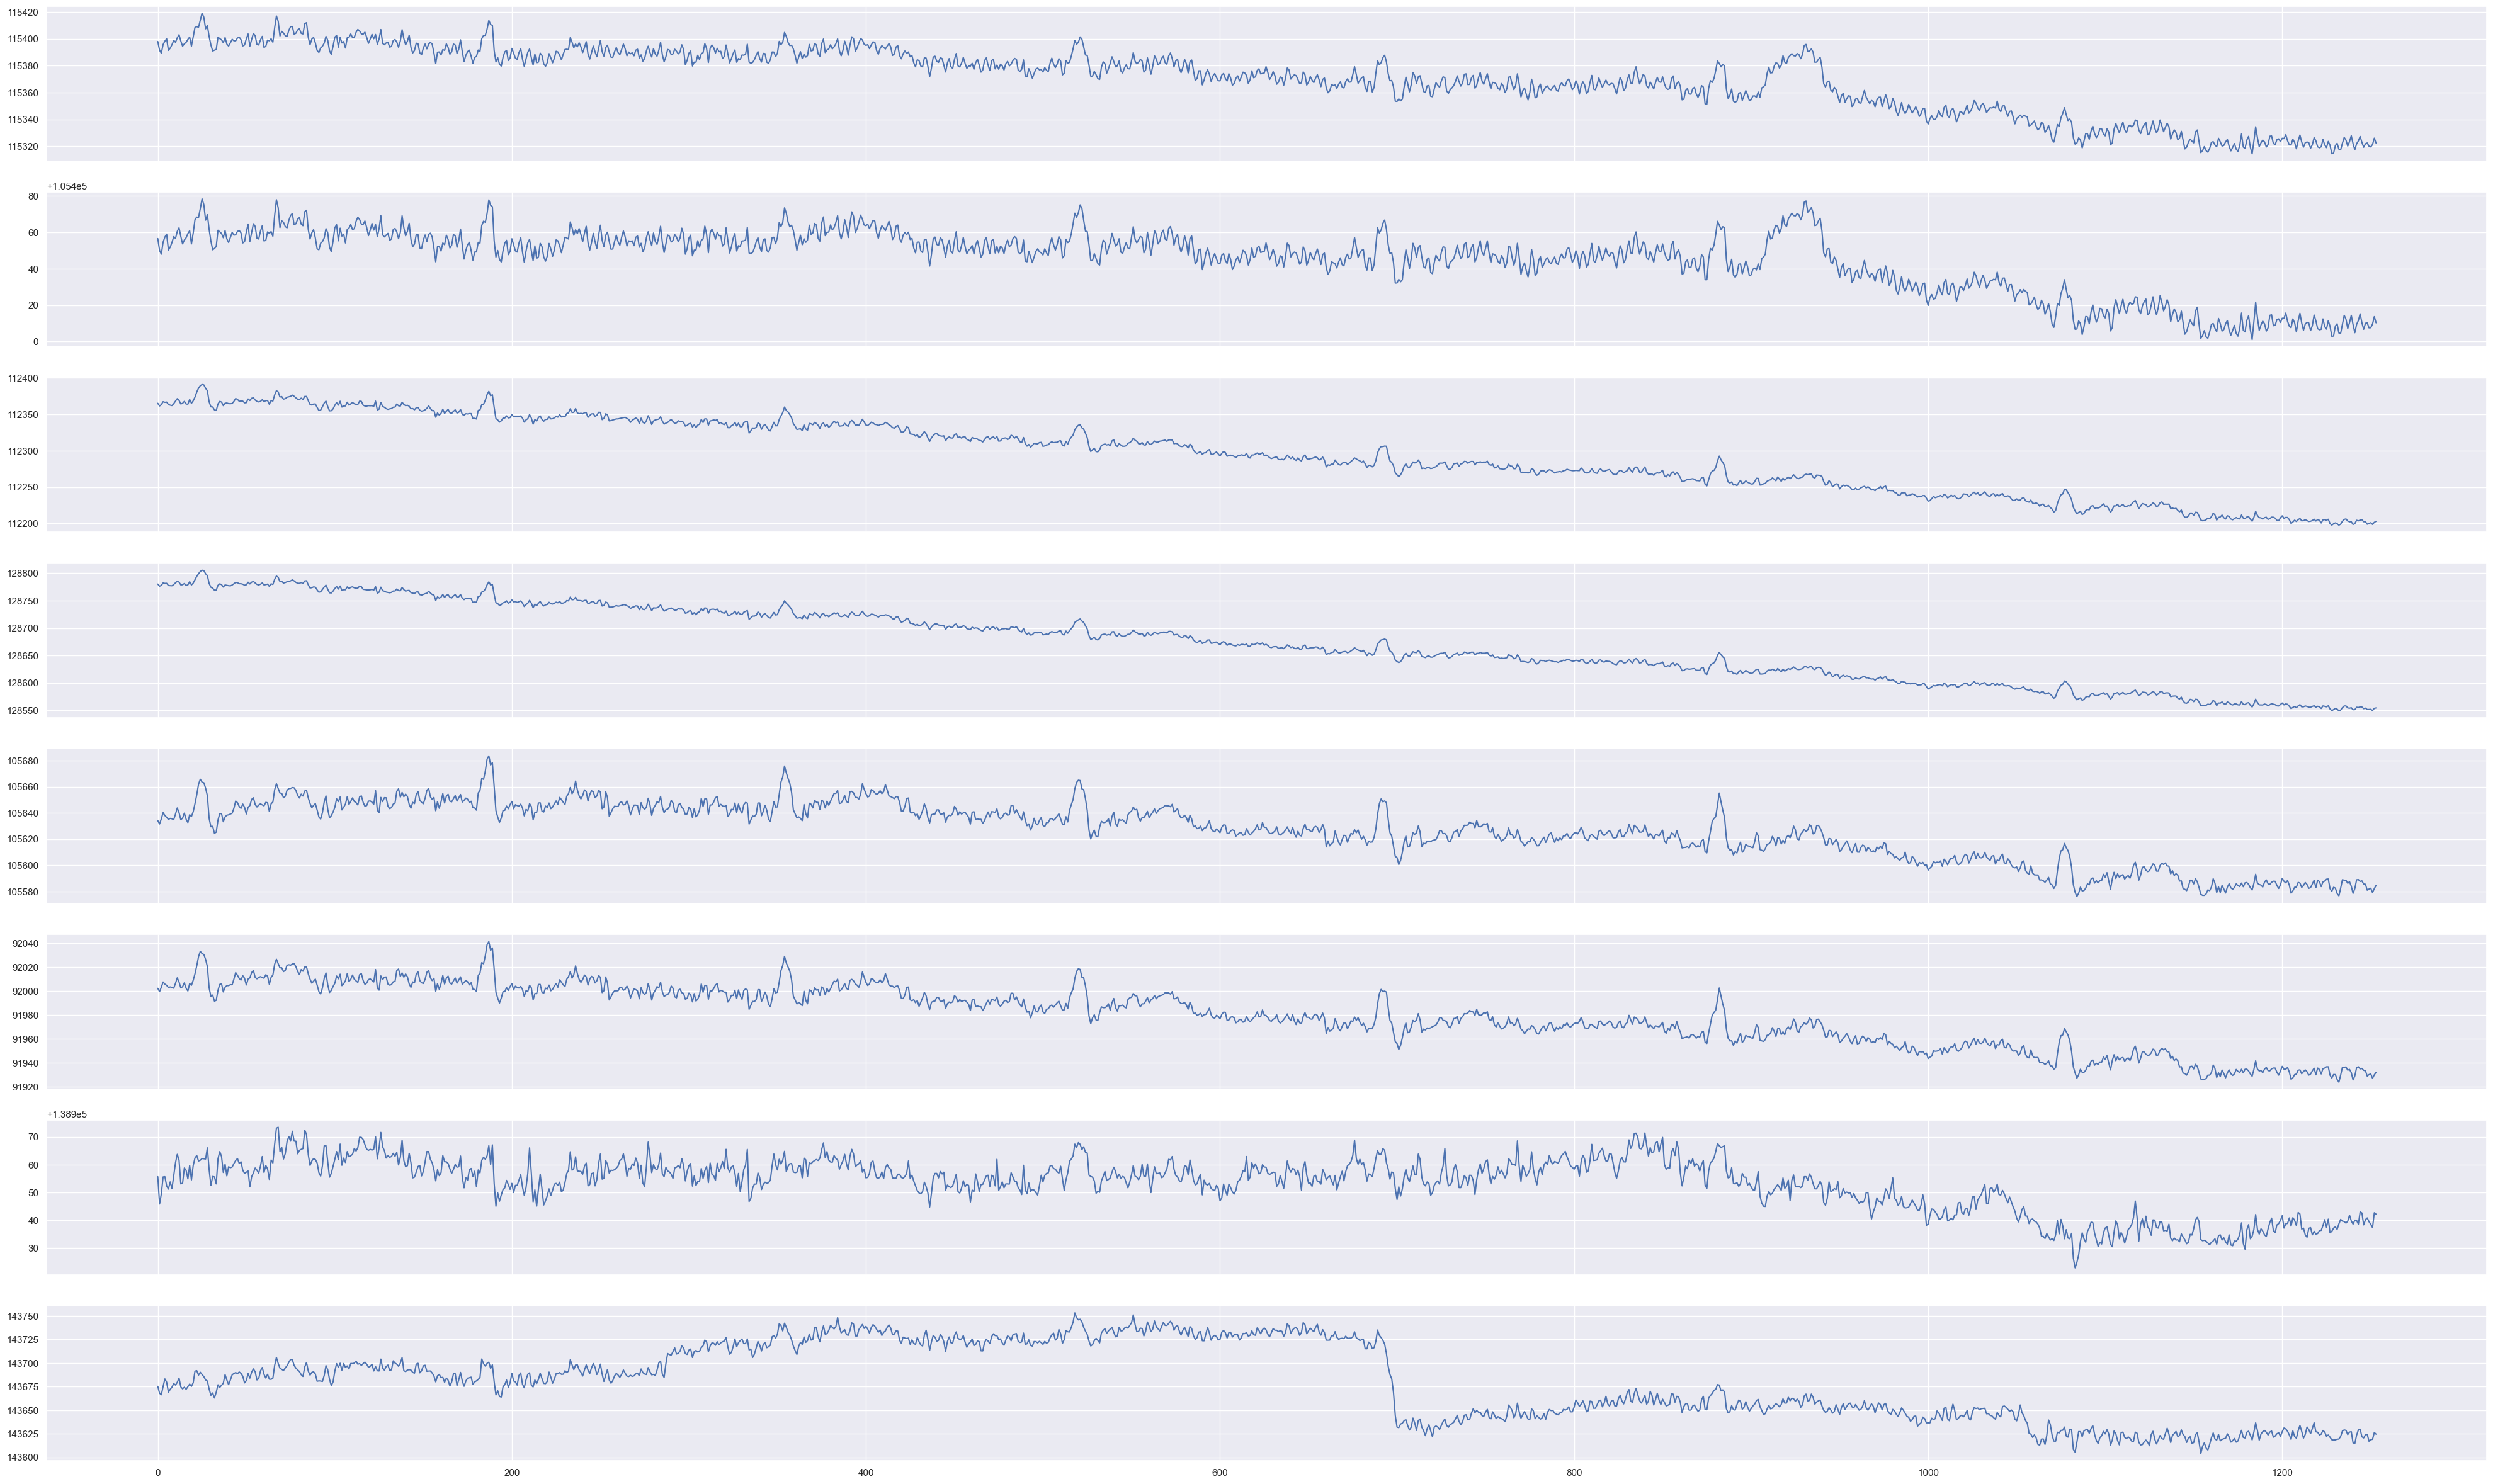

In [44]:
duration = args.window_length * args.sample_rate

def colour_trials(non_zero_trials, channel_data = [str(i) for i in range(8)]):
    for trial_idx in range(len(non_zero_trials)):
        plt.figure(figsize=(50, 30))
        fig, axes = plt.subplots(8, 1, sharex=True, figsize=(50, 30))
        ltrial = non_zero_trials[trial_idx]
        ltrial.index = np.arange(ltrial.shape[0])
        for idx, ax in enumerate(axes):
            ax.plot(ltrial.loc[:, channel_data[idx]])

        ltrial_freq = ltrial.iloc[0]['Frequency']
        windowed_predictions = []

        for end_index in trange(duration, ltrial.shape[0]):
            sample = np.array(ltrial[end_index - duration: end_index])
            sample = sample[:, :-1]
            sample = np.expand_dims(sample, axis=0)
            prepared = knn.prepare(sample)
            prediction, correlations = knn.predict(prepared)
            frequency = knn.convert_index_to_frequency(prediction)
            windowed_predictions.append(frequency[0])

        for ei, wp in enumerate(windowed_predictions):
            xf = np.linspace(ei, ei + duration, duration)
            fc = 'green'
            if wp != ltrial_freq:
                fc = 'red'
            for idx, ax in enumerate(axes):
                small = ltrial.loc[:, f"CH{idx + 1}"].min()
                beeg = ltrial.loc[:, f"CH{idx + 1}"].max()
                ax.fill_between(xf, small, beeg, facecolor=fc, alpha=0.05)
        axes[0].set_title(f"Segment for trial {trial_idx}, freq: {ltrial_freq}")
        plt.show()
colour_trials(non_zero_trials, [f"CH{idx}" for idx in range(1, 9)])